## Credit Cart Fraud Detection 

#### *by Massimiliano, Pierpaolo & Eddie*

### Table of contents

* [0. **Packages** import and **evaluating functions**](#section_0)

* [1. **Preprocessing** & **Visualization**](#chapter1)
    * [Section 1.1](#section_1_1)
    * [Section 1.2](#section_1_2)
    
* [2. **Normalization** and **Train test split**](#chapter2)

* [3. **Parametric** Models](#chapter3)
     * [Section 3.1](#section_3_1)
     * [Section 3.2](#section_3_2)
     * [Section 3.3](#section_3_3)
* [4. **Non parametric** Models](#chapter4)

* [5. **Neural networks**](#chapter5)

* [6. Conclusions](#chapter6)

### 0. **Packages** import and **evaluating functions** <a class="anchor" id="section_0"></a>

In [1]:
# import basic packages

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

In [2]:
# def function for evaluating models

def evaluate_model_prediction(y_true, y_pred):
    
    pr,rc,f1,su = precision_recall_fscore_support(y_true, y_pred, average='binary')
    
    print("""
    ----------------------------------------------------
    -Precision: {}
    -Recall: {}
    -F1 score: {}
    ----------------------------------------------------
    
    Confusion matrix:""".format(pr,rc,f1))
    
    sizeplots = (5,5)
    plt.figure(figsize=sizeplots)

    cm = confusion_matrix(y_true, y_pred)

    sns.heatmap(cm,
                fmt= ".5g",
                annot=True,
                annot_kws={"size": 15},
                cmap = sns.cubehelix_palette(start=2, rot=0, dark=0.05, light=.95, reverse=False, as_cmap=True),
                xticklabels=['Not Fraud', 'Fraud'],
                yticklabels=['Not Fraud', 'Fraud'])
    plt.xlabel("Predicted label")
    plt.ylabel("True label")

In [3]:
# def function for evaluating model marginal distribution

def evaluate_model_marginal(y_true, y_pred, model_name, round_ = 3):
    
    cnf_matrix = confusion_matrix(y_true,y_pred)
    cm_marginal = cnf_matrix/cnf_matrix.sum(axis=0)
    
    print('{} detects {}% of frauds and {}% of non frauds'.format(model_name, cm_marginal.round(round_)[1][1]*100,cm_marginal.round(round_)[0][0]*100))

### 1. **Preprocessing** & **Visualization** <a class="anchor" id="chapter1"></a>

In [4]:
# import & show data

data = pd.read_csv('./data/creditcard.csv')
data.head(5)

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [5]:
# show that V variables are result of PCA transformation

data_pca = data.iloc[:,1:29]
data_pca.corr().round(decimals=1)

V1   V2   V3   V4   V5   V6   V7   V8   V9  V10  ...  V19  V20  V21  \
V1   1.0  0.0 -0.0  0.0  0.0  0.0  0.0 -0.0  0.0  0.0  ...  0.0  0.0 -0.0   
V2   0.0  1.0  0.0 -0.0 -0.0  0.0  0.0 -0.0 -0.0 -0.0  ...  0.0 -0.0  0.0   
V3  -0.0  0.0  1.0 -0.0 -0.0  0.0  0.0  0.0 -0.0  0.0  ...  0.0 -0.0 -0.0   
V4   0.0 -0.0 -0.0  1.0 -0.0 -0.0  0.0  0.0  0.0  0.0  ... -0.0 -0.0 -0.0   
V5   0.0 -0.0 -0.0 -0.0  1.0  0.0 -0.0  0.0  0.0 -0.0  ... -0.0  0.0 -0.0   
V6   0.0  0.0  0.0 -0.0  0.0  1.0  0.0 -0.0  0.0  0.0  ...  0.0  0.0 -0.0   
V7   0.0  0.0  0.0  0.0 -0.0  0.0  1.0 -0.0  0.0  0.0  ... -0.0  0.0  0.0   
V8  -0.0 -0.0  0.0  0.0  0.0 -0.0 -0.0  1.0  0.0  0.0  ... -0.0 -0.0 -0.0   
V9   0.0 -0.0 -0.0  0.0  0.0  0.0  0.0  0.0  1.0 -0.0  ...  0.0 -0.0  0.0   
V10  0.0 -0.0  0.0  0.0 -0.0  0.0  0.0  0.0 -0.0  1.0  ...  0.0 -0.0  0.0   
V11  0.0  0.0 -0.0 -0.0  0.0  0.0 -0.0  0.0  0.0  0.0  ...  0.0 -0.0 -0.0   
V12  0.0 -0.0  0.0 -0.0  0.0  0.0  0.0 -0.0 -0.0  0.0  ...  0.0  0.0  0.0   
V13 -0.0  0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0  ... -0.0  0.0  0.0   
V14  0.0 -0.0  0.0 -0.0 -0.0  0.0 -0.0 -0.0  0.0  0.0  ... -0.0 -0.0  0.0   
V15 -0.0  0.0  0.0 -0.0 -0.0 -0.0  0.0  0.0 -0.0  0.0  ... -0.0  0.0  0.0   
V16  0.0  0.0  0.0 -0.0 -0.0 -0.0  0.0  0.0 -0.0 -0.0  ...  0.0  0.0 -0.0   
V17 -0.0 -0.0  0.0 -0.0  0.0  0.0  0.0 -0.0  0.0  0.0  ... -0.0 -0.0 -0.0   
V18  0.0  0.0  0.0  0.0  0.0  0.0 -0.0 -0.0  0.0  0.0  ... -0.0 -0.0 -0.0   
V19  0.0  0.0  0.0 -0.0 -0.0  0.0 -0.0 -0.0  0.0  0.0  ...  1.0  0.0  0.0   
V20  0.0 -0.0 -0.0 -0.0  0.0  0.0  0.0 -0.0 -0.0 -0.0  ...  0.0  1.0 -0.0   
V21 -0.0  0.0 -0.0 -0.0 -0.0 -0.0  0.0 -0.0  0.0  0.0  ...  0.0 -0.0  1.0   
V22  0.0  0.0  0.0  0.0  0.0 -0.0 -0.0  0.0  0.0 -0.0  ... -0.0  0.0  0.0   
V23  0.0  0.0  0.0  0.0  0.0 -0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
V24  0.0 -0.0 -0.0  0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0  ...  0.0  0.0  0.0   
V25 -0.0 -0.0  0.0  0.0  0.0  0.0  0.0 -0.0  0.0 -0.0  ...  0.0 -0.0 -0.0   
V26 -0.0  0.0  0.0 -0.0  0.0 -0.0 -0.0 -0.0 -0.0 -0.0  ...  0.0 -0.0 -0.0   
V27  0.0 -0.0  0.0 -0.0  0.0 -0.0 -0.0  0.0 -0.0 -0.0  ... -0.0 -0.0 -0.0   
V28  0.0 -0.0  0.0 -0.0 -0.0  0.0 -0.0 -0.0  0.0 -0.0  ... -0.0 -0.0  0.0   

     V22  V23  V24  V25  V26  V27  V28  
V1   0.0  0.0  0.0 -0.0 -0.0  0.0  0.0  
V2   0.0  0.0 -0.0 -0.0  0.0 -0.0 -0.0  
V3   0.0  0.0 -0.0  0.0  0.0  0.0  0.0  
V4   0.0  0.0  0.0  0.0 -0.0 -0.0 -0.0  
V5   0.0  0.0 -0.0  0.0  0.0  0.0 -0.0  
V6  -0.0 -0.0 -0.0  0.0 -0.0 -0.0  0.0  
V7  -0.0  0.0 -0.0  0.0 -0.0 -0.0 -0.0  
V8   0.0  0.0 -0.0 -0.0 -0.0  0.0 -0.0  
V9   0.0  0.0 -0.0  0.0 -0.0 -0.0  0.0  
V10 -0.0  0.0 -0.0 -0.0 -0.0 -0.0 -0.0  
V11 -0.0  0.0  0.0 -0.0 -0.0 -0.0 -0.0  
V12 -0.0  0.0  0.0  0.0 -0.0 -0.0  0.0  
V13 -0.0 -0.0 -0.0  0.0 -0.0 -0.0  0.0  
V14  0.0  0.0  0.0 -0.0 -0.0  0.0  0.0  
V15 -0.0  0.0 -0.0  0.0  0.0 -0.0 -0.0  
V16  0.0  0.0 -0.0 -0.0 -0.0  0.0  0.0  
V17 -0.0  0.0 -0.0  0.0  0.0  0.0 -0.0  
V18 -0.0 -0.0 -0.0 -0.0  0.0  0.0  0.0  
V19 -0.0  0.0  0.0  0.0  0.0 -0.0 -0.0  
V20  0.0  0.0  0.0 -0.0 -0.0 -0.0 -0.0  
V21  0.0  0.0  0.0 -0.0 -0.0 -0.0  0.0  
V22  1.0  0.0  0.0 -0.0 -0.0 -0.0 -0.0  
V23  0.0  1.0 -0.0 -0.0  0.0  0.0  0.0  
V24  0.0 -0.0  1.0  0.0  0.0 -0.0 -0.0  
V25 -0.0 -0.0  0.0  1.0  0.0 -0.0  0.0  
V26 -0.0  0.0  0.0  0.0  1.0 -0.0 -0.0  
V27 -0.0  0.0 -0.0 -0.0 -0.0  1.0 -0.0  
V28 -0.0  0.0 -0.0  0.0 -0.0 -0.0  1.0  

[28 rows x 28 columns]

#### 1.1 Time variable trasformation <a class="anchor" id="section_1_1"></a>

In [6]:
# make time column useful, transform it in 24h

data['Time'] = data['Time'].apply(lambda x: int(np.ceil(float(x)/3600) % 24))
data.groupby(by='Time').count().tail(5)

V1     V2     V3     V4     V5     V6     V7     V8     V9    V10  \
Time                                                                         
19    17036  17036  17036  17036  17036  17036  17036  17036  17036  17036   
20    15651  15651  15651  15651  15651  15651  15651  15651  15651  15651   
21    16757  16757  16757  16757  16757  16757  16757  16757  16757  16757   
22    17708  17708  17708  17708  17708  17708  17708  17708  17708  17708   
23    15433  15433  15433  15433  15433  15433  15433  15433  15433  15433   

      ...    V21    V22    V23    V24    V25    V26    V27    V28  Amount  \
Time  ...                                                                   
19    ...  17036  17036  17036  17036  17036  17036  17036  17036   17036   
20    ...  15651  15651  15651  15651  15651  15651  15651  15651   15651   
21    ...  16757  16757  16757  16757  16757  16757  16757  16757   16757   
22    ...  17708  17708  17708  17708  17708  17708  17708  17708   17708   
23    ...  15433  15433  15433  15433  15433  15433  15433  15433   15433   

      Class  
Time         
19    17036  
20    15651  
21    16757  
22    17708  
23    15433  

[5 rows x 30 columns]

#### 1.2 Graphs <a class="anchor" id="section_1_2"></a>

<AxesSubplot:title={'left':'Fraud vs Non frauds Amount with no outliers'}, xlabel='Amount', ylabel='Class'>

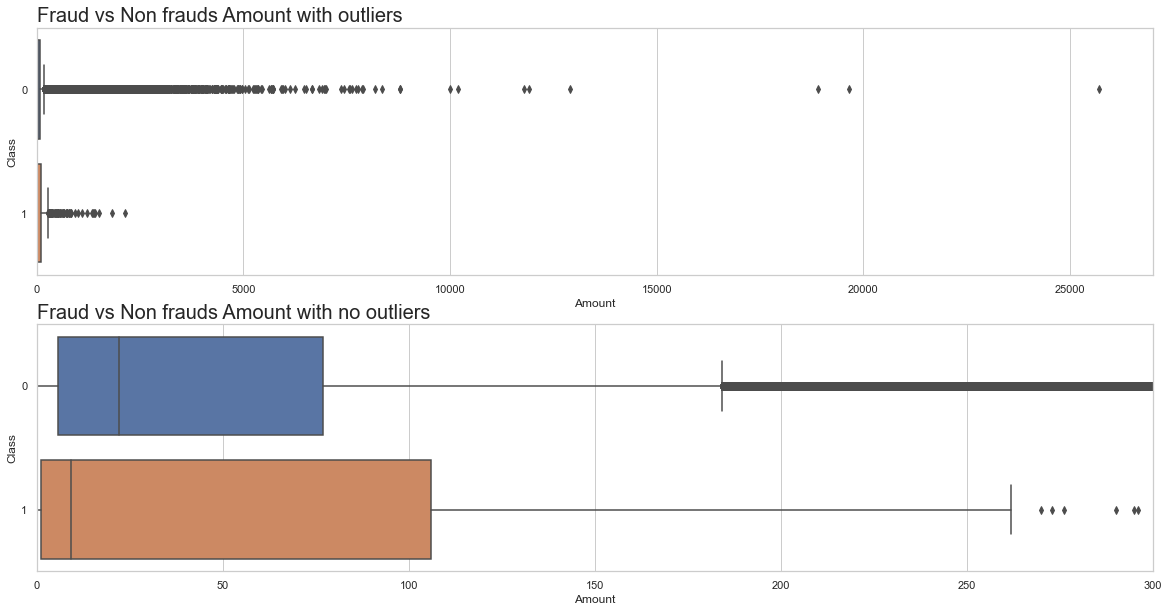

In [60]:
# Fraud vs Non frauds Amount of transaction
f, ax = plt.subplots(2,1,figsize=(20, 10))

ax[0].set_title('Fraud vs Non frauds Amount with outliers',fontsize = 20,loc='left')
ax[0].set(xlim=(0, 27000))
sns.boxplot(data.Amount,data.Class, ax = ax[0], orient= 'h')

ax[1].set_title('Fraud vs Non frauds Amount with no outliers',fontsize = 20, loc='left')
ax[1].set(xlim=(0, 300))
sns.boxplot(data.Amount,data.Class, ax = ax[1], orient= 'h')

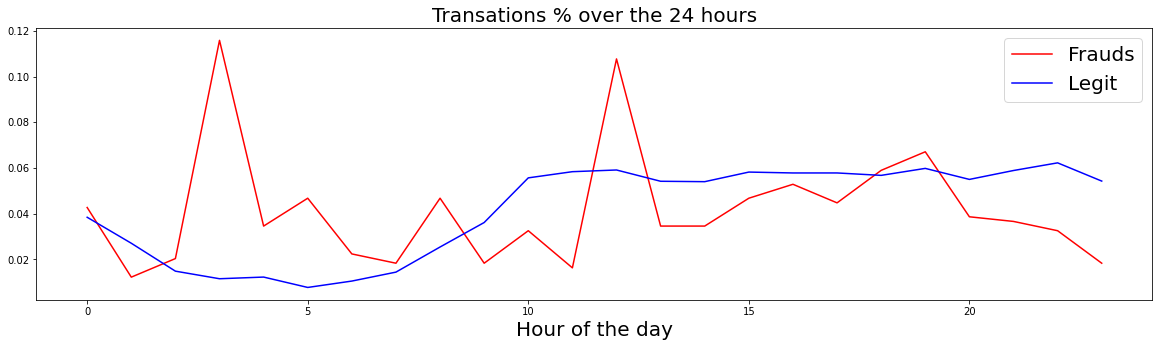

In [8]:
### create pivot table for creating the plot
t_over_time = data.pivot_table(values='Amount',index='Time',columns='Class',aggfunc='count')
# create rel columns
t_over_time['fraud_perc'] =  t_over_time[1]/t_over_time[1].sum()
t_over_time['norm_perc'] =  t_over_time[0]/t_over_time[0].sum()
# del abs columns
t_over_time.drop(0, axis=1, inplace=True)
t_over_time.drop(1, axis=1, inplace=True)

# plot
plt.figure(figsize=(20,5))
plt.title('Transations % over the 24 hours',fontsize=20)
plt.plot(t_over_time.index, t_over_time.fraud_perc, c = 'r', label = 'Frauds')
plt.plot(t_over_time.index, t_over_time.norm_perc, c = 'b', label = 'Legit')
plt.xlabel('Hour of the day',fontsize=20)
plt.legend(fontsize=20)

### 2. **Normalization** and **Train test split** <a class="anchor" id="chapter2"></a>

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# split features and target 

X = data.iloc[:,:-1]
y = data["Class"]
print("The features are: {}".format(list(X.columns)))
print("The variable of interest is: {}\n".format(y.name))

# scale features

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# train test split wiuth sklearn package mantaining y proportion of classes
'''Stratify = y: It is desirable to split the dataset into train and test sets in a way that preserves the same proportions of examples in each class as observed in the original dataset.'''

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3, random_state = 0)

print("Number of samples of train set: {}".format(len(y_train)))
print("Number of frauds in train set: {}".format(y_train.value_counts()[1]))
print("Number of samples of test set: {}".format(len(y_test)))
print("Number of frauds in test set: {}".format(y_test.value_counts()[1]))

The features are: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
The variable of interest is: Class

Number of samples of train set: 199364
Number of frauds in train set: 344
Number of samples of test set: 85443
Number of frauds in test set: 148


### 3. **Parametric** Models <a class="anchor" id="chapter3"></a>

#### 3.1 Logistic Regression <a class="anchor" id="section_3_1"></a>

In [ ]:
from sklearn.linear_model import LogisticRegression

# fit and evaluate logistic regression

lr_model = LogisticRegression(random_state = 0)
lr_model.fit(X_train,y_train)
pred_lr = lr_model.predict(X_test)
evaluate_model_prediction(y_test, pred_lr)

In [ ]:
evaluate_model_marginal(y_test, pred_lr, 'Logistic regression')

#### 3.2 Ridge Regression Classifier <a class="anchor" id="section_3_2"></a>

In [ ]:
from sklearn.linear_model import RidgeClassifier

# fit and evaluate ridge regression classifier with default alpha

rr_model = RidgeClassifier(alpha=1.0, random_state=0)
rr_model.fit(X_train,y_train)
pred_rr = rr_model.predict(X_test)
evaluate_model_prediction(y_test, pred_rr)

In [ ]:
evaluate_model_marginal(y_test, pred_rr, 'Ridge regression classifier with default alpha')

In [ ]:
from sklearn.linear_model import RidgeClassifierCV

# fit and evaluate ridge regression with built in cross validation

rrcv_model = RidgeClassifierCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0, 100.0])
rrcv_model.fit(X_train,y_train)
pred_rrcv = rrcv_model.predict(X_test)
evaluate_model_prediction(y_test, pred_rrcv)

In [ ]:
evaluate_model_marginal(y_test, pred_rrcv, 'Ridge classifier with cross validation')

In [ ]:
# fit and evaluate ridge regression with parameter search

alpha_parameters = [1e-3, 1e-2, 1e-1, 1, 10, 100]
for a in alpha_parameters:
        prediction = RidgeClassifier(alpha=a, random_state=0).fit(X_train,y_train).predict(X_test)
        cnf_matrix = confusion_matrix(y_test,prediction)
        cm_marginal = cnf_matrix/cnf_matrix.sum(axis=0)
        evaluate_model_marginal(y_test, pred_rrcv, f'Ridge classifier with alpha = {a}', round_ = 6)

#### 3.3 Support Vector Machine <a class="anchor" id="section_3_3"></a>

In [ ]:
from sklearn import svm

# fit and evaluate support vector machine with default c

svm_model = svm.SVC(random_state = 0)
svm_model.fit(X_train,y_train)
pred_svm = svm_model.predict(X_test)
evaluate_model_prediction(y_test, pred_svm)

In [ ]:
evaluate_model_marginal(y_test, pred_svm, 'Support Vector Machine (C default)')
print('We have a bad recall: 0.574')

In [ ]:
k_ = ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
c_ = [1,5,10,25]
for k in k_:
    for c in c_:
        svm_model = svm.SVC(C = c, kernel = k, random_state = 0)
        svm_model.fit(X_train,y_train)
        pred_svm = svm_model.predict(X_test)
        
        pr,rc,f1,su = precision_recall_fscore_support(y_test, pred_svm, average='binary')
        print("""
        Svm with kernel = {} and C = {}
        Precision: {} Recall: {} 
        ----------------------------------------------------
        """.format(k,c,pr,rc))

### 4. **Non parametric** Models <a class="anchor" id="chapter4"></a>

### 5. **Neural networks** <a class="anchor" id="chapter5"></a>

### 6. Conclusions <a class="anchor" id="chapter6"></a>